# The Do-calculus


$$P(y_x|x',y')$$
$$P(Y_x) = P(Y|do(x)) = P_x(Y)$$


## Rule 1: Ignoring observations


$$\newcommand\ci{\perp\!\!\!\perp}$$
$$\newcommand{\ubar}[1]{\underset{\bar{}}{#1}}
\newcommand{\obar}[1]{\overset{\bar{}}{#1}}$$

$$P(y|do(x),{\color{blue}z},w) = P(y|do(x),w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

or in the Shpitser notation:

$$P_x(y|{\color{blue}z},w) = P_x(y|w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

## Rule 2: Action/Observation Change

$$P(y|do(x), \color{red}{do(z)}, w) = P(y|do(x),\color{red} z, w)\text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$
or in Shpitser notation:

$$P_{x,\color{red}z}(y|w) = P_x(y|\color{red}z,w) \text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$

Where $G_{\bar{X},\ubar{Z}}$  is taken to mean the graph obtained from $G$ by removing arrows pointing to $X$ and arrows leaving $Z$. 

# Rule 3: Ignoring actions

$$P(y|do(x),\color{green}{do(z)},w) = P(y|do(x),w)\text{ if }(Y\ci Z|X,W)_{G_{\bar{X}\bar{Z(W)}}}$$

where $Z(W)$ is the set of $Z$ nodes not ancestors of any $W$-node in $G_{\bar{X}}$.



# Theorem 2: The bow arc is not identifiable.

We construct two causal models $M^1$ and $M^2$ such that $P^1(X, Y)=P^2(X, Y)$ ,and $P^1_x(Y)\ne P^2_x(Y)$.The two models agree on the following: all 3 variables are boolean, $U$ is a fair coin, and $f_X(u)=u$.Let $⊕$ denote the exclusive or (XOR) function. Then the value of $Y$ is determined by the function $u⊕x$ in $M^1$, while $Y$ is set to $0$ in $M^2$.

In [34]:
from probability_trees import PTree, Critical, MinCut
from IPython.display import Latex
def bow_arc1( bvar ):
    if 'U' not in bvar:
        return flip( 'U', 0.5)
               
    if 'X' not in bvar:
        if bvar['U'] == '0':
            return [(1, 'X=0'),
                    (0, 'X=1')]
        else:
            return [(0, 'X=0'),
                    (1, 'X=1')]
    if 'Y' not in bvar:
        if bvar['X'] == bvar['U']:
            return [(1, 'Y=0'),
                    (0, 'Y=1')]
        else:
            return [(0, 'Y=0'),
                    (1, 'Y=1')]
    return None

def bow_arc2( bvar ):
    if 'U' not in bvar:
        return [(0.5, 'U=0'),
                (0.5, 'U=1')]
    if 'X' not in bvar:
        if bvar['U'] == '0':
            return [(1, 'X=0'),
                    (0, 'X=1')]
        else:
            return [(0, 'X=0'),
                    (1, 'X=1')]
    if 'Y' not in bvar:
        return [(1, 'Y=0'),
                (0, 'Y=1')]
    return None


def flip( U, p ):
     return [(1-p, f'{U}=0'),
             (p  , f'{U}=1')]

def fix( X, x, p):
    return [(1-p, f'{X}={1-x}'),
            ( p , f'{X}={x}')]

def xor(A, B, C):
    return [(1, f'{C}={A^B}')]
             
M1 = PTree.fromFunc(bow_arc1)
M2 = PTree.fromFunc(bow_arc2)
       

 Then $P^1(Y=0)=P^2(Y=0)=1$, $P^1(X=0)=P^2(X=0)=0.5$. Therefore, $P^1(X, Y)=P^2(X, Y)$. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

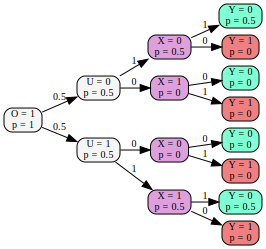

In [27]:
Y0= M1.prop("Y=0")
X0 = M1.prop("X=0")
display(Latex(f'$$P^1(Y=0)={M1.prob(Y0)}$$'))
display(Latex(f'$$P^1(X=0)={M1.prob(X0)}$$'))

M1.show(show_prob=True, cut=Y0,crit=M1.critical(Y0))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

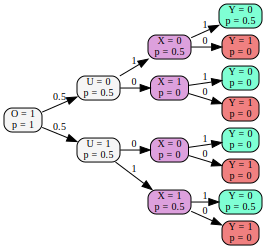

In [28]:
Y0 = M2.prop("Y=0")
X0 = M2.prop("X=0")
display(Latex(f'$$P^2(Y=0)={M2.prob(Y0)}$$'))
display(Latex(f'$$P^2(X=0)={M2.prob(X0)}$$'))

M2.show(show_prob=True, cut=Y0,crit=M2.critical(Y0))


while $P^2_x(Y=0)=1\ne P^1_x(Y=0)=0.5$. Note that while $P$ is non-positive, it is straightforward to modify the proof for the positive case by letting $f_Y$ functions in both models return 1 half the time, and the values outlined above half the time.

<IPython.core.display.Latex object>

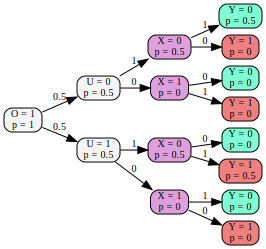

In [29]:
X0 = M1.prop("X=0")
display(Latex(f'$$P^1(Y=0|X\leftarrow 0)={M1.do(X0).prob(Y0)}$$'))
M1.do(X0).show(show_prob=True, cut=Y0, crit=M1.do(X0).critical(Y0))

<IPython.core.display.Latex object>

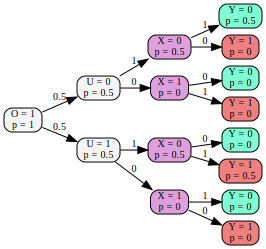

In [19]:
X0 = M2.prop("X=0")
display(Latex(f'$$P^2(Y=0|X\leftarrow 0)={M2.do(X0).prob(Y0)}$$'))
M1.do(X0).show(show_prob=True, cut=Y0, crit=M2.do(X0).critical(Y0))

# front door



In [25]:
from probability_trees import PTree, Critical, MinCut
from IPython.display import Latex
def front_door1( bvar ):
    if 'U' not in bvar:
        return flip( 'U', 0.5)
               
    if 'X' not in bvar:
        if bvar['U'] == '0':
            return [(1, 'X=0'),
                    (0, 'X=1')]
        else:
            return [(0, 'X=0'),
                    (1, 'X=1')]
    if 'M' not in bvar:
        if bvar['X'] == '0':
            return [(1, 'M=0'),
                    (0, 'M=1')]
        else:
            return [(0, 'M=0'),
                    (1, 'M=1')]
    if 'Y' not in bvar:
        if bvar['M'] == bvar['U']:
            return [(1, 'Y=0'),
                    (0, 'Y=1')]
        else:
            return [(0, 'Y=0'),
                    (1, 'Y=1')]
    return None

def front_door2( bvar ):
    if 'U' not in bvar:
        return [(0.5, 'U=0'),
                (0.5, 'U=1')]
    if 'X' not in bvar:
        if bvar['U'] == '0':
            return [(1, 'X=0'),
                    (0, 'X=1')]
        else:
            return [(0, 'X=0'),
                    (1, 'X=1')]
    if 'M' not in bvar:
        if bvar['X'] == '0':
            return [(1, 'M=0'),
                    (0, 'M=1')]
        else:
            return [(0, 'M=0'),
                    (1, 'M=1')]
    if 'Y' not in bvar:
        return [(1, 'Y=0'),
                (0, 'Y=1')]
    return None


def flip( U, p ):
     return [(1-p, f'{U}=0'),
             (p  , f'{U}=1')]

def fix( X, x, p):
    return [(1-p, f'{X}={1-x}'),
            ( p , f'{X}={x}')]

def xor(A, B, C):
    return [(1, f'{C}={A^B}')]
             
F1 = PTree.fromFunc(front_door1)
F2 = PTree.fromFunc(front_door2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

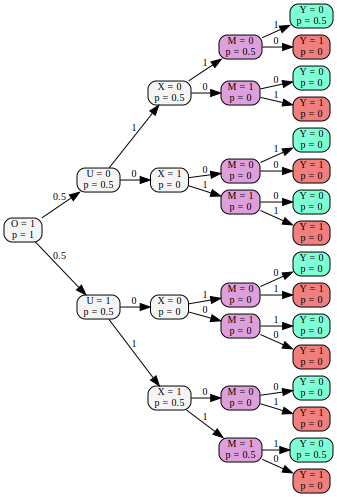

In [31]:
Y0= F1.prop("Y=0")
X0 = F1.prop("X=0")
display(Latex(f'$$P^1(Y=0)={F1.prob(Y0)}$$'))
display(Latex(f'$$P^1(X=0)={F1.prob(X0)}$$'))

F1.show(show_prob=True, cut=Y0,crit=F1.critical(Y0))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

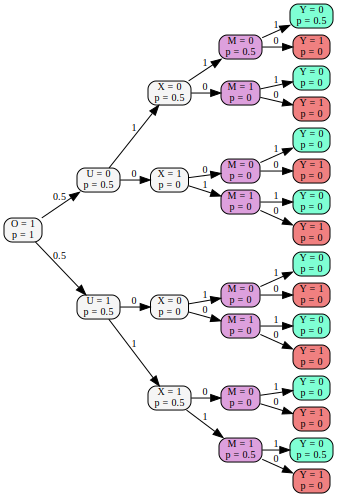

In [32]:
Y0 = F2.prop("Y=0")
X0 = F2.prop("X=0")
display(Latex(f'$$P^2(Y=0)={F2.prob(Y0)}$$'))
display(Latex(f'$$P^2(X=0)={F2.prob(X0)}$$'))

F2.show(show_prob=True, cut=Y0,crit=F2.critical(Y0))


while $P^2_x(Y=0)=1\ne P^1_x(Y=0)=0.5$. Note that while $P$ is non-positive, it is straightforward to modify the proof for the positive case by letting $f_Y$ functions in both models return 1 half the time, and the values outlined above half the time.

<IPython.core.display.Latex object>

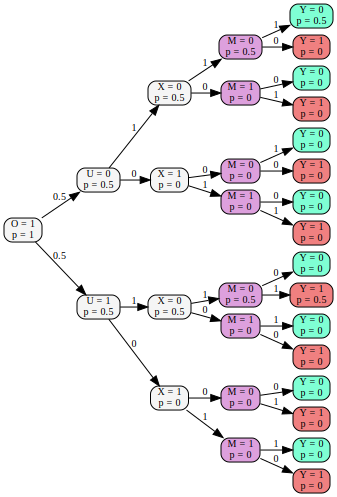

In [33]:
X0 = F1.prop("X=0")
display(Latex(f'$$P^1(Y=0|X\leftarrow 0)={F1.do(X0).prob(Y0)}$$'))
F1.do(X0).show(show_prob=True, cut=Y0, crit=F1.do(X0).critical(Y0))

<IPython.core.display.Latex object>

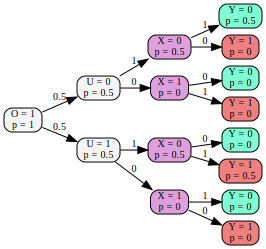

In [19]:
X0 = F2.prop("X=0")
display(Latex(f'$$P^2(Y=0|X\leftarrow 0)={F2.do(X0).prob(Y0)}$$'))
M1.do(X0).show(show_prob=True, cut=Y0, crit=F2.do(X0).critical(Y0))

# C-component
Let $G$ be a semi-Markovian graph such that a subset of its bidirected arcs forms a spanning tree over all vertices in $G.$Then $G$ is a C-component(confounded component).

Let a path composed entirely of bidirected
edges be called a bidirected path. The set of variables $V$ can
be partitioned into disjoint groups by assigning two variables
to the same group if and only if they are connected by a
bidirected path. 

# Definition 4: (C-tree)

Let $G$ be a semi-Markovian graph such that $G$ is a C-component, all observable nodes have at most one child, and there is a node $Y$ such that $An(Y)_G= G$.Then $G$ is a $Y$-rooted C-tree (confounded tree).


# A tree is not a Computer science tree!

In computer science, the root of a tree has no parents, and the leaves have no children. And all children have only one parent.

In the Pearlian world, the root of a tree has no children, and all nodes have at most one child. The issue is that the arrows point in the opposite direction.  

# $An( Y )$ includes $Y$!

From "[A General Identification Condition for Causal Effects](https://ftp.cs.ucla.edu/pub/stat_ser/R290-A.pdf)" by Tian and Pearl 2002:

Let  $An( S )$ denote  the  union  of  a  set $S$ and  the  set  of ancestors of the variables in $S$, and let $G_{An( S )}$ denote the subgraph of $G$ composed only of variables in $An( S )$.